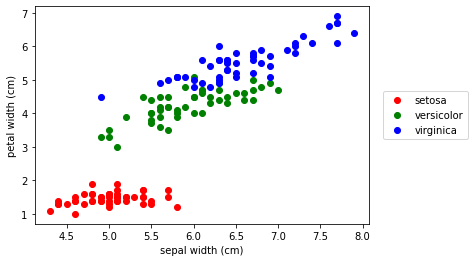

In [1]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

irisDB = load_iris()

#Obtener las caracter´ısticas (datos de entrada X) y la clase (y).
X = irisDB.data
Y = irisDB.target

data = X[:,[0,2]]

#Separa los datos en los tres tipos
setosa = data[0:int(Y.size/3 -1)]
versicolor = data[int(Y.size/3):int(2*Y.size/3 -1)]
virginica = data[int(2*Y.size/3):int(Y.size)]

#Pintamos cada tipo de un color diferente
plt.scatter(setosa[:,0:1],setosa[:,1:2],c='r', label='setosa')
plt.scatter(versicolor[:,0:1],versicolor[:,1:2],c='g',label='versicolor')
plt.scatter(virginica[:,0:1],virginica[:,1:2],c='b',label='virginica')

plt.xlabel('sepal len (cm)')
plt.ylabel('petal len (cm)')
#Posicion de la leyenda
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()





In [5]:
import numpy as np
from sklearn.datasets import load_iris

irisDB = load_iris()
X = irisDB.data
y = irisDB.target

#Funcion que nos perimte realizar el ejercicio, como parametros vamos a necesitar los datos
#el tamaño del test y una semilla por si queremos repetir la aleatoriead 
def my_train_test_split(X,y,test_size=0.2,rand_state=10):
    
    #Concateno tanto la X como la y para que cuando randomize no se pierda la relacion
    concatenada = np.concatenate((X,y.reshape(len(y),1)),axis=1)
    #Dividimos en los tres tipos
    setosa = concatenada[0:int((len(X)/3))]
    ver =  concatenada[int(len(X)/3):int((2/3 * len(X)))]
    virgi =  concatenada[int(2/3 * len(X)) : len(X) ]

    #Aleatorizamos 
    np.random.seed(rand_state)
    rand_setosa = np.random.permutation(setosa)
    rand_ver = np.random.permutation(ver)
    rand_virgi = np.random.permutation(virgi)
       

    #Creamos el training cogiendo el numero de elementos que deseemos (test_size) 
    train = np.concatenate((rand_setosa[0:int(len(rand_setosa)*(1-test_size))],rand_ver[0:int(len(rand_ver)*(1-test_size))],rand_virgi[0:int(len(rand_virgi)*(1-test_size))] ),axis=0)
    #Randomizamos los casos de entrenamiento
    rand_train = np.random.permutation(train)
    #Separamos las caracteristicas
    X_train = rand_train[:,[0,1,2,3]]
    y_train = rand_train[:,[4]]
    
    #Igual con test
    test = np.concatenate((rand_setosa[0:int(len(rand_setosa)*(test_size))],rand_ver[0:int(len(rand_ver)*(test_size))],rand_virgi[0:int(len(rand_virgi)*(test_size))] ),axis=0)
    rand_test = np.random.permutation(test)
    
    X_test = rand_test[:,[0,1,2,3]]
    y_test = rand_test[:,[4]]

    #Convertimos esto a un array
    y_train, = np.asarray(y_train.T)
    y_test, = np.asarray(y_test.T)
    return X_train, X_test, y_train, y_test

    
X_train,X_test,y_train,y_test = my_train_test_split(X,y,test_size=0.2)

print("--- Clase Setosa ---")
print("Ejemplos Train: " ,int(len(X)*0.8/3))
print("Ejemplos Test: " ,int(len(X)*0.2/3))
print("--- Clase Versicolor ---")
print("Ejemplos Train: " ,int(len(X)*0.8/3))
print("Ejemplos Test: " ,int(len(X)*0.2/3))
print("--- Clase Virgincia---")
print("Ejemplos Train: " ,int(len(X)*0.8/3))
print("Ejemplos Test: " ,int(len(X)*0.2/3))
print("Clase de los ejemplos de entrenamiento: ",len(y_train))
print(y_train)
print("Clase de los ejemplos de test: " ,len(y_test))
print(y_test)



--- Clase Setosa ---
Ejemplos Train:  40
Ejemplos Test:  10
--- Clase Versicolor ---
Ejemplos Train:  40
Ejemplos Test:  10
--- Clase Virgincia---
Ejemplos Train:  40
Ejemplos Test:  10
Clase de los ejemplos de entrenamiento:  120
[2. 1. 1. 0. 2. 2. 1. 1. 2. 1. 0. 1. 0. 2. 2. 1. 2. 0. 0. 1. 2. 2. 1. 0.
 2. 0. 2. 2. 2. 2. 2. 0. 1. 1. 1. 2. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 1. 1.
 1. 0. 2. 1. 0. 2. 2. 2. 0. 1. 0. 2. 0. 2. 0. 0. 0. 2. 1. 0. 1. 1. 0. 1.
 1. 1. 2. 1. 1. 0. 1. 2. 1. 0. 2. 1. 2. 1. 0. 2. 2. 1. 1. 2. 1. 1. 1. 2.
 0. 0. 0. 0. 0. 2. 0. 2. 2. 2. 0. 0. 1. 0. 1. 2. 2. 1. 0. 2. 0. 2. 0. 1.]
Clase de los ejemplos de test:  30
[1. 0. 1. 2. 1. 2. 0. 2. 2. 0. 0. 1. 2. 2. 1. 0. 0. 1. 2. 0. 2. 2. 2. 0.
 0. 1. 1. 0. 1. 1.]


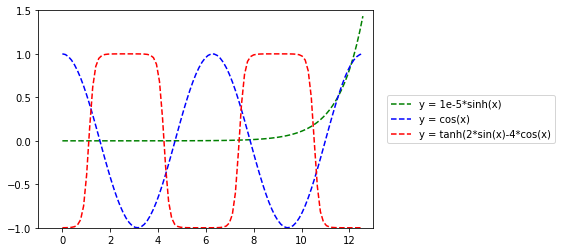

In [9]:
#Ejercicios 3 Valores equidistantes entre 0 y 4pi

import math 
import numpy as np
import matplotlib.pyplot as plt

#Primera funcion 10^-5 * sinh
#100 Valores equidistantes entre 0 y 4pi
coord_x = np.linspace(0,4*math.pi,100)
coord_y = [pow(10,-5)*math.sinh(i) for i in coord_x]
plt.plot(coord_x, coord_y, color='g', linestyle='--', label="y = 1e-5*sinh(x)")

#Segunda funcion cos
coord_y = [math.cos(i) for i in coord_x]
plt.plot(coord_x, coord_y, color='b', linestyle='--', label="y = cos(x)")

#Tercera funcion
coord_y = [math.tanh(2*math.sin(i)- 4*math.cos(i)) for i in coord_x]
plt.plot(coord_x, coord_y, color='r', linestyle='--', label="y = tanh(2*sin(x)-4*cos(x)")

#Determino el limite de los ejes
plt.xlim([-1,13])
plt.ylim([-1,1.5])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

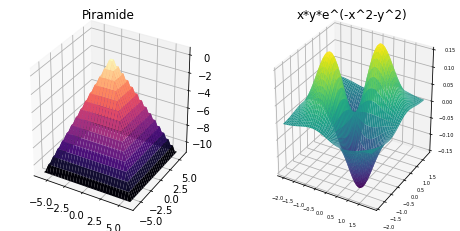

In [13]:
#Ejercicios4

import numpy as np
import matplotlib.pyplot as plt

#Defino las dos funciones
def f1(x,y):
   return( 1- abs(x+y) - abs(y-x))
def f2(x,y):
   return( x*y*np.exp(-x**2-y**2))

#Realizo graficos 3D
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#Defino los puntos desde -6 a 6 en 30 separaciones

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
#Matrices de coordenadas a partir de los vectores de coordenadas
X, Y = np.meshgrid(x, y)
#Aplico la primera funcion
Z = f1(X, Y)

#Pinto la primera figura, la piramide con las coordenadas anteriores
fig1 = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='magma', edgecolor='none')
ax.set_title('Piramide')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlim3d(-2, 2,auto=True)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-0.15, 0.15)

#Igual con la otra figura
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)



X, Y = np.meshgrid(x, y)
Z = f2(X, Y)
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('x*y*e^(-x^2-y^2)')

#Divisiones en los ejes
plt.xticks(np.arange(-2,2,step=0.5))
plt.yticks(np.arange(-2,2,step=0.5))

#Tamaño dela letra de los ejes
ax.tick_params(axis="x", labelsize=5)
ax.tick_params(axis="y", labelsize=5)
ax.tick_params(axis="z", labelsize=5)

plt.show()